# Business Understanding

## Context Project AppBakkers

**AppBakkers** werkt aan een project rondom het herkennen van **abnormale geluiden in een specifieke omgeving**, genaamd **Noesis**. Op dit moment zijn er twee oplossingen bedacht om geluid te herkennen met behulp van *deep learning*.

### Doelen van het project
**Groeperen van geluiden** \
Doel: **Inzicht krijgen in het geluidslandschap van een omgeving.** \
We willen weten:
- hoeveel verschillende geluiden er zijn,
- hoe vaak specifieke geluiden voorkomen, 
- en veelvoorkomende geluiden verminderen in de training (om overfitting te voorkomen).

## Onze Businesscase

Om voor dit project een specifieker vraagstuk te kunnen beantwoorden hebben we het onderzoeken en groeperen van audio-data **afgebakend tot een specifieke context**. Hierdoor kunnen we een uitgewerkte, duidelijke **business vraag** beantwoorden, terwijl de resultaten nogsteeds relevant zijn voor het door AppBakkers aangeleverde project.

### Business Vraag

- “Is het haalbaar om een mobiele app te ontwikkelen die op basis van geluid vogelsoorten in real-time herkent, want als vogelspotter wil ik weten welke vogel ik hoor.” 

### Doel

**Data Mining Doelen**:
- Er wordt Unsupervised Learning (clustering) toegepast op feature-geëxtraheerde audiodata om deze te groeperen. 
- Er wordt Supervised Learning (voorspellend model) toegepast om op basis van audiofeatures automatisch het type geluid (vogelsoort of achtergrondgeluid) te classificeren.

# Data Understanding

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vogeldata = pd.read_csv('Data/Dataset1/birds.csv')

In [401]:
vogeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gen            500 non-null    object 
 1   sp             500 non-null    object 
 2   ssp            17 non-null     object 
 3   grp            500 non-null    object 
 4   en             500 non-null    object 
 5   rec            500 non-null    object 
 6   cnt            500 non-null    object 
 7   loc            500 non-null    object 
 8   lat            498 non-null    float64
 9   lon            498 non-null    float64
 10  alt            484 non-null    object 
 11  type           499 non-null    object 
 12  sex            128 non-null    object 
 13  stage          140 non-null    object 
 14  method         500 non-null    object 
 15  url            500 non-null    object 
 16  file           500 non-null    object 
 17  file-name      500 non-null    object 
 18  length    

**Gen**: Genus van de vogel (wetenschappelijke naam) \
**Sp**: Soort van de vogel. \
**Ssp**: Subsoort van de vogel. \
**Grp**: Welk soort dier het is. \
**En**: Engelse naam van de vogel. \
**Rec**: Naam van de persoon die het geluid heeft opgenomen. \
**Cnt**: Land waar het is opgenomen. \
**Loc**: Locatie van waar het geluid is opgenomen. \
**Lat**: De latitude (breedtegraad) \
**Lon**: De longitude (lengtegraad) \
**Method**: Methode hoe het geluid is opgenomen. \
**Url**: Url van de opnamepagina. \
**File**: Download link voor het geluid. \
**File-name**: Naam van de file. \
**Length**: Duur van de opname. \
**Date**: Datum van opname. \
**Uploaded**: Datum wanneer het geluid is geupload. \
**Animal seen**: Hier wordt antwoord gegeven op de vraag of de Opnemer de vogel heeft gezien. \
**Playback-used**: Hier wordt antwoord gegeven op de vraag of er is geplaybacked. \
**q**: Kwaliteit van de opname. Dit gaat van A tot E, waarbij A het beste is.  

In [402]:
vogeldata.head(2)

,gen,sp,ssp,grp,en,rec,cnt,loc,lat,lon,...,method,url,file,file-name,length,date,uploaded,animal-seen,playback-used,q
0,Gallinago,gallinago,NaN,birds,Common Snipe,Gosse Hoekstra,Netherlands,"Tzummarum, Waadhoeke, Friesland",53.2602,5.5326,...,field recording,//xeno-canto.org/843222,https://xeno-canto.org/843222/download,XC843222-CS-221123-08H25M.mp3,0:24,2023-11-22,2023-11-22,yes,no,B
1,Gallinago,gallinago,NaN,birds,Common Snipe,Michel Veldt,Netherlands,"Bodegraven, Bodegraven-Reeuwijk, Zuid-Holland",52.0747,4.7632,...,field recording,//xeno-canto.org/771007,https://xeno-canto.org/771007/download,XC771007-Watersnip-roep---Bodegraven---2022-10...,0:19,2022-10-17,2022-12-23,no,no,B


In [403]:
vogeldata.columns

Index(['gen', 'sp', 'ssp', 'grp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lon',
       'alt', 'type', 'sex', 'stage', 'method', 'url', 'file', 'file-name',
       'length', 'date', 'uploaded', 'animal-seen', 'playback-used', 'q'],
      dtype='object')

In [404]:
rijen, kolommen = vogeldata.shape

print(f"Aantal rijen: {rijen}")
print(f"Aantal kolommen: {kolommen}")

Aantal rijen: 500
Aantal kolommen: 24


In [405]:
NULL = vogeldata.isnull().sum()
print("Aantal NULL:\n", NULL)

Aantal NULL:
 gen                0
sp                 0
ssp              483
grp                0
en                 0
rec                0
cnt                0
loc                0
lat                2
lon                2
alt               16
type               1
sex              372
stage            360
method             0
url                0
file               0
file-name          0
length             0
date               0
uploaded           0
animal-seen        0
playback-used      0
q                  0
dtype: int64


In [406]:
dubbele_rijen = vogeldata[vogeldata.duplicated()]
print(f"Aantal dubbele rijen: {len(dubbele_rijen)}")

Aantal dubbele rijen: 0


In [407]:
numerical_columns = vogeldata.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = vogeldata.select_dtypes(include=['object']).columns

Data_types_summary = {
    'Numeriek': numerical_columns.tolist(),
    'Categorisch': categorical_columns.tolist(),
}

for data_type, columns in Data_types_summary.items():
    print(f"{data_type} kolommen: {columns}")

Numeriek kolommen: ['lat', 'lon']
Categorisch kolommen: ['gen', 'sp', 'ssp', 'grp', 'en', 'rec', 'cnt', 'loc', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file', 'file-name', 'length', 'date', 'uploaded', 'animal-seen', 'playback-used', 'q']


# Data Preparation

## Benodigde Pip Installs

In [ ]:
% pip install librosa
% pip install functions
% pip install torch

## Importeren benodigde libraries

In [472]:
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from scipy.signal import stft
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

## Vogeldata uitlezen

In [409]:
vogelkopie = vogeldata[['url', 'file', 'file-name']].copy()

vogelkopie.count()

url          500
file         500
file-name    500
dtype: int64

In [410]:
import requests
import os

# user confirmation
proceed = input("Do you want to download all audio files? (yes/no): ")
if proceed.lower() == "yes":
    output_dir = "audio_files"
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over each row in the DataFrame
    for index, row in vogelkopie.iterrows():
        audio_file = row['file']  # Get the audio file URL
        file_name = row['file-name']  # Get the file name

        # Define the full path to save the file
        file_path = os.path.join(output_dir, file_name)

        try:
            # Download the audio file
            response = requests.get(audio_file, stream=True)
            response.raise_for_status()  # Raise an error for bad responses

            # Save the file locally
            with open(file_path, 'wb') as audio_file:
                audio_file.write(response.content)

            print(f"Downloaded: {file_name}")
        except Exception as e:
            print(f"Failed to download {file_name}: {e}")
else:
    print("Download cancelled by user.")

Download cancelled by user.


In [411]:
import librosa
import soundfile as sf
import os

# Directory containing the audio files
input_dir = "audio_files"
output_dir = "audio_fragments"

proceed = input("Do you want to split audio into fragments of 2 seconds? (yes/no): ")
if proceed.lower() == "yes":
# Iterate through all audio files in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith(".mp3") or file_name.endswith(".wav") or file_name.endswith(".MP3"):  # Process only audio files
            file_path = os.path.join(input_dir, file_name)

            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)  # Load with the original sampling rate

            # Split the audio into 2-second fragments
            fragment_duration = 2 * sr  # 2 seconds in samples
            for i in range(0, len(y), fragment_duration):
                fragment = y[i:i + fragment_duration]  # Extract the fragment
                fragment_name = f"{os.path.splitext(file_name)[0]}_fragment_{i // fragment_duration}.wav"
                fragment_path = os.path.join(output_dir, fragment_name)

                # Save the fragment as a .wav file
                sf.write(fragment_path, fragment, sr)
                print(f"Created: {fragment_name}")

    print("All audio files have been split into 2-second fragments.")
else:
    print("Splitting cancelled by user.")

Splitting cancelled by user.


## Fragments_data.csv file aanmaken

In [412]:
#fragments_df.loc[fragments_df['fragment'].str.contains('tureluur', case=False, na=False), 'labels'] = 'tureluur'

In [413]:
#fragments_df = fragments_df.dropna(subset=['labels'])

In [414]:
#fragments_df.to_csv('Data/fragments_data.csv', index=False)

## Het Fragments_data.csv file

In [415]:
fragmenten_df = pd.read_csv('Data/fragments_data.csv')
fragmenten_df.head()

,fragment,labels,label_numeric
0,05190.100417.watersniproepEempolder_fragment_0...,watersnip,0
1,05190.100417.watersniproepEempolder_fragment_1...,watersnip,0
2,05190.100417.watersniproepEempolder_fragment_2...,watersnip,0
3,05190.100417.watersniproepEempolder_fragment_3...,watersnip,0
4,05190.100417.watersniproepEempolder_fragment_4...,watersnip,0


In [416]:
en_counts = fragmenten_df['labels'].value_counts()

print(en_counts)

labels
tureluur                  1238
oeverloper                 861
witgat                     674
watersnip                  579
zwarte ruiter              476
grauwe franjepoot           24
geelpootruiter              23
steenloper                  17
steltloper                   8
amerikaanse oeverloper       2
Name: count, dtype: int64


## train en test data aanmaken, features en filenames

In [417]:
fragmenten_df = pd.read_csv('Data/fragments_data.csv')
birchFragmenten_df = fragmenten_df.copy()
birchFragmenten_df.head()

,fragment,labels,label_numeric
0,05190.100417.watersniproepEempolder_fragment_0...,watersnip,0
1,05190.100417.watersniproepEempolder_fragment_1...,watersnip,0
2,05190.100417.watersniproepEempolder_fragment_2...,watersnip,0
3,05190.100417.watersniproepEempolder_fragment_3...,watersnip,0
4,05190.100417.watersniproepEempolder_fragment_4...,watersnip,0


In [418]:
train_data, test_data = train_test_split(birchFragmenten_df, test_size=0.3, random_state=42)
test_data.head()

,fragment,labels,label_numeric
948,XC466471-Redshank (2)_fragment_0.wav,tureluur,1
3036,XC749107-2022-09-14 2020 Oeverlopers_fragment_...,oeverloper,4
1960,XC590410-200918_0480_2257_Watersnip_fragment_1...,watersnip,0
3543,XC834752-01.-1950-2050-watersnip_fragment_5.wav,watersnip,0
1689,"XC561755-Oeverloper, flight call, IGS, 050520,...",oeverloper,4


In [419]:
label_counts = test_data['labels'].value_counts()
print(label_counts)

labels
tureluur                  362
oeverloper                256
witgat                    202
watersnip                 170
zwarte ruiter             149
geelpootruiter             11
grauwe franjepoot          10
steenloper                  7
steltloper                  3
amerikaanse oeverloper      1
Name: count, dtype: int64


In [420]:
# Initialize the features and filenames lists
features = []
filenames = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features.append(feature_vector)
    filenames.append(fragment)

features = np.array(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

distance_matrix = squareform(pdist(features, metric='euclidean'))

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\

In [421]:
# Ensure features array is valid before applying t-SNE
if np.isnan(features).any() or np.isinf(features).any():
    print("Error: Features array contains NaN or infinite values. Please check your data.")
else:
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(features)

# Clustering

## Clustering: Birch

### Data Preparation

In [422]:
from sklearn.cluster import Birch

In [423]:
# Pas Birch clustering toe op de features
birch = Birch(n_clusters=10, threshold=0.1)
birch_labels = birch.fit_predict(features)

# Voeg de labels toe aan de dataset
# Map the Birch cluster labels to the bird names using the test_data labels
# Voeg de labels toe aan de dataset
species_labels_birch = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in birch_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_birch = [i for i, label in enumerate(species_labels_birch) if label != 'Onbekend']
filtered_features_tsne_birch = features_tsne[filtered_indices_birch]
filtered_species_labels_birch = [species_labels_birch[i] for i in filtered_indices_birch]

### Modeling

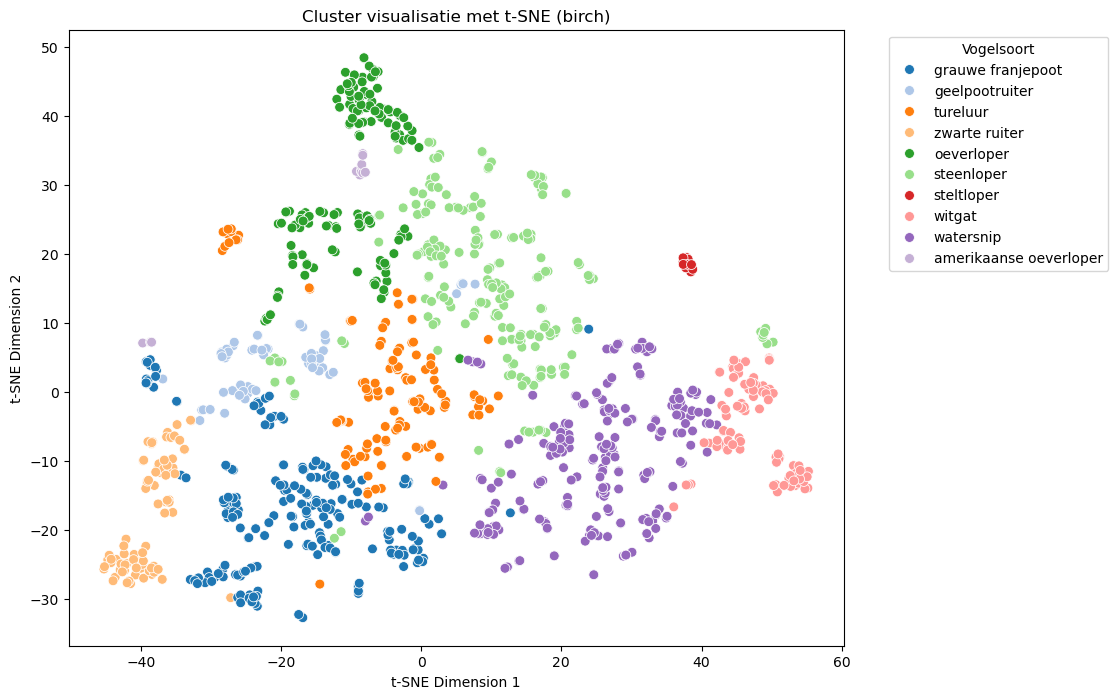

In [424]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_birch[:, 0], y=filtered_features_tsne_birch[:, 1], hue=filtered_species_labels_birch, palette='tab20', s=50)
plt.title("Cluster visualisatie met t-SNE (birch)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: HDBSCAN

### Data Preparation

In [425]:
import hdbscan

# Pas HDBSCAN toe op de t-SNE features
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean')
hdbscan_labels = hdbscan_clusterer.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels_hdbscan = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in hdbscan_labels
]

### Modeling

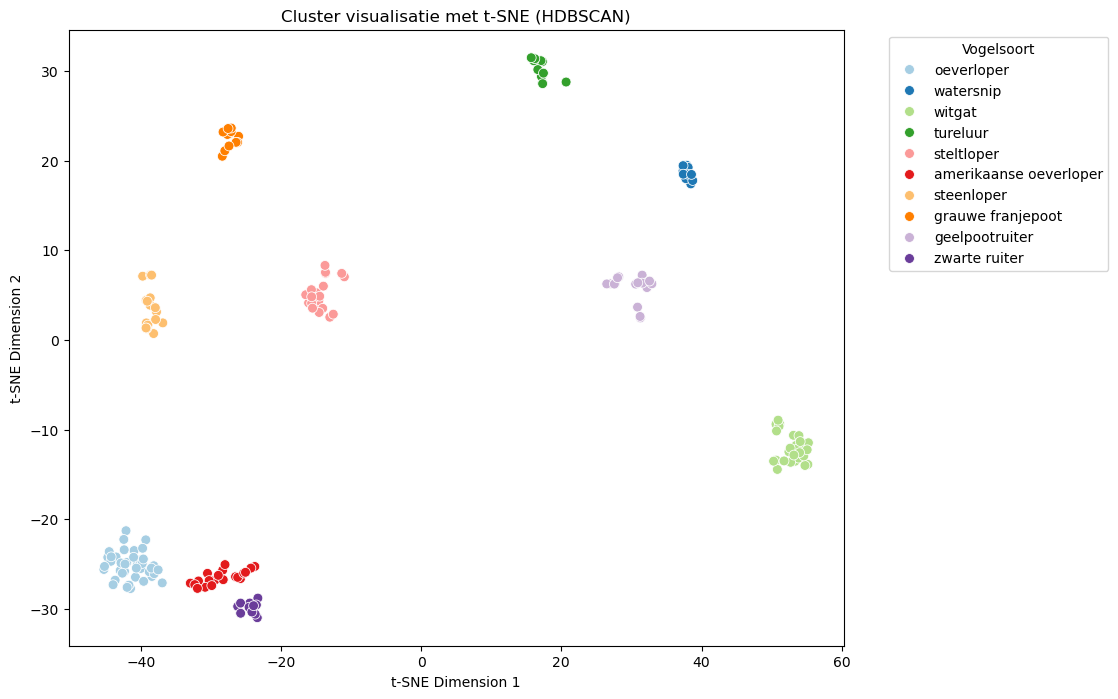

In [426]:
# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_hdbscan = [i for i, label in enumerate(species_labels_hdbscan) if label != 'Onbekend']
filtered_features_tsne_hdbscan = features_tsne[filtered_indices_hdbscan]
filtered_species_labels_hdbscan = [species_labels_hdbscan[i] for i in filtered_indices_hdbscan]

# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_hdbscan[:, 0], y=filtered_features_tsne_hdbscan[:, 1], hue=filtered_species_labels_hdbscan, palette='Paired', s=50)
plt.title("Cluster visualisatie met t-SNE (HDBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: DBSCAN

### Data Preparation

In [427]:
from sklearn.cluster import DBSCAN

# Pas DBSCAN toe op de t-SNE features
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels_dbscan = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in dbscan_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_dbscan = [i for i, label in enumerate(species_labels_dbscan) if label != 'Onbekend']
filtered_features_tsne_dbscan = features_tsne[filtered_indices_dbscan]
filtered_species_labels_dbscan = [species_labels_dbscan[i] for i in filtered_indices_dbscan]


### Modeling

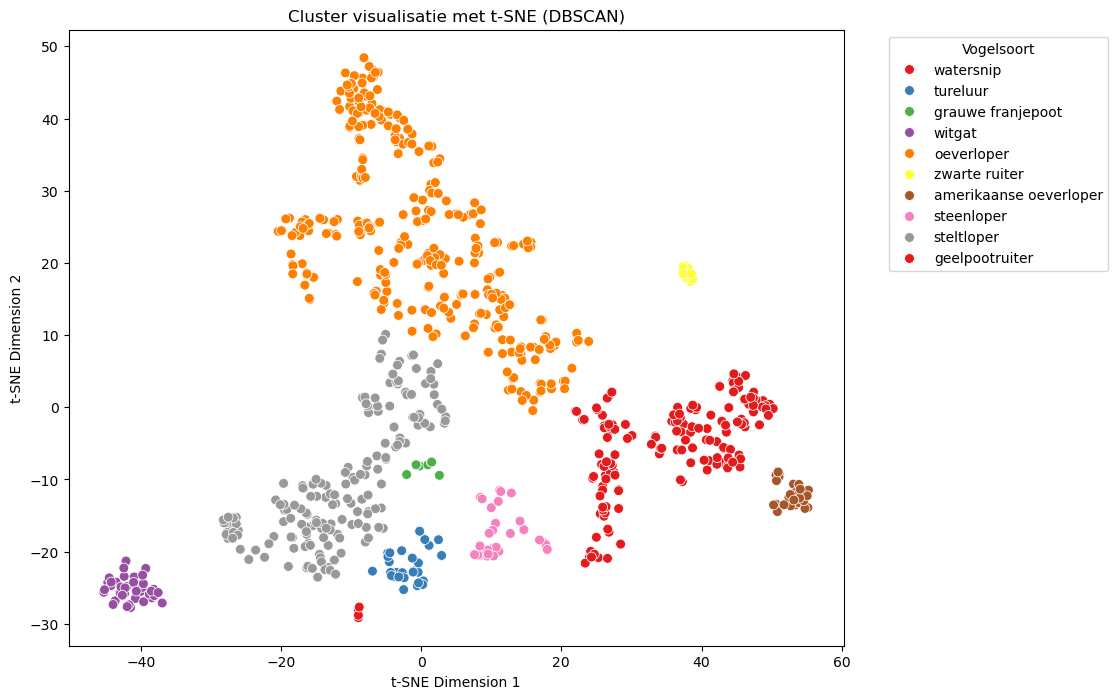

In [428]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_dbscan[:, 0], y=filtered_features_tsne_dbscan[:, 1], hue=filtered_species_labels_dbscan, palette='Set1', s=50)
plt.title("Cluster visualisatie met t-SNE (DBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: Affinity Propagation

### Data Preparation

In [429]:
from sklearn.cluster import AffinityPropagation

In [430]:
# Pas Affinity clustering toe op de features
affinity = AffinityPropagation(random_state=42)
affinity_labels = affinity.fit_predict(features)

# Voeg de labels toe aan de dataset
# Map the Affinity cluster labels to the bird names using the test_data labels
# Voeg de labels toe aan de dataset
species_labels_affinity = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in affinity_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_affinity = [i for i, label in enumerate(species_labels_affinity) if label != 'Onbekend']
filtered_features_tsne_affinity = features_tsne[filtered_indices_affinity]
filtered_species_labels_affinity = [species_labels_affinity[i] for i in filtered_indices_affinity]

### Modeling

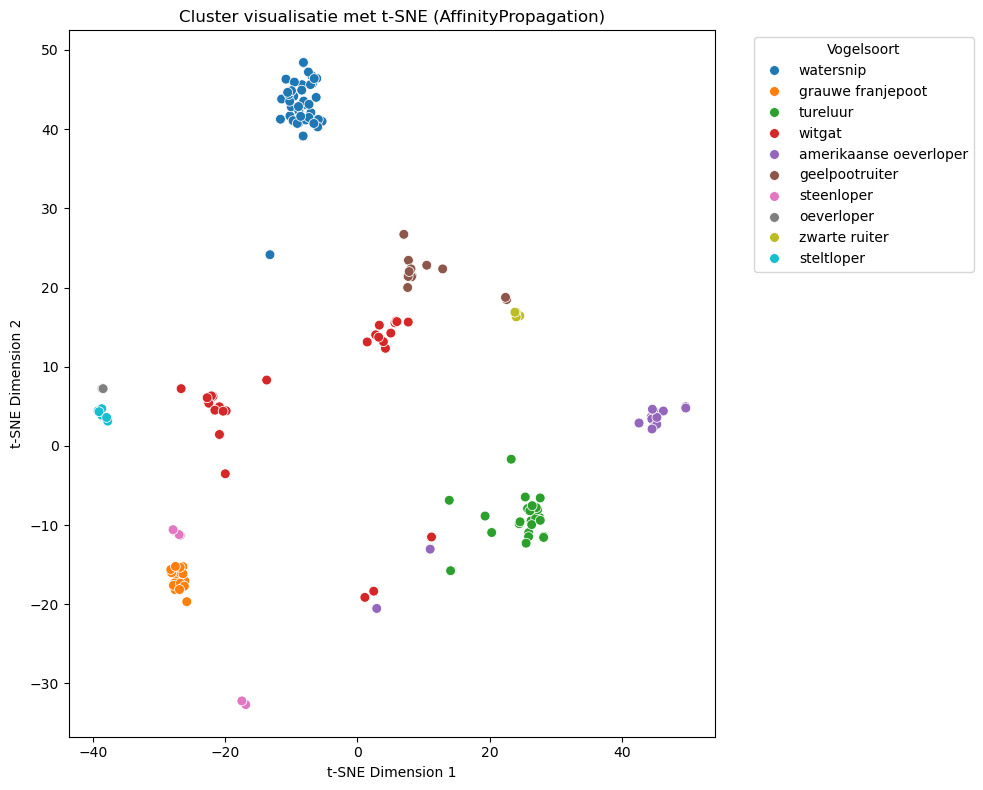

In [431]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=filtered_features_tsne_affinity[:, 0],
    y=filtered_features_tsne_affinity[:, 1],
    hue=filtered_species_labels_affinity,
    palette='tab10',
    s=50
)
plt.title("Cluster visualisatie met t-SNE (AffinityPropagation)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Clustering: Agglomerative Hierarchical Clustering

### Data Preparation

In [432]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

#### Alle Features

In [436]:
combined_features = []
file_names_2 = []
labels_2 = []

for idx, row in test_data.iterrows():
    file_path = os.path.join("audio_fragments", row['fragment'])

    try:
        y, sr = librosa.load(file_path, sr=None)

        # --- MFCC ---
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)

        # --- Spectrogram ---
        D = librosa.stft(y, n_fft=1024, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        spec_mean = np.mean(S_db, axis=1)
        spec_mean = spec_mean[:50]  # Truncate for consistency (optional)

       # --- Chroma ---
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)
        
    # Combine everything
        features = np.concatenate([
            mfcc_mean,
            spec_mean,
            chroma_mean,
        ])

        combined_features.append(features)
        file_names_2.append(row['fragment'])
        labels_2.append(row['labels'])

    except Exception as e:
        print(f"Fout bij laden van {row['fragment']}: {e}")

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\

In [437]:
max_len_combi = max([len(f) for f in combined_features])
spectro_features_combi = [np.pad(f, (0, max_len_combi - len(f)), mode='constant') for f in combined_features]

# Make a DataFrame
feature_df_2 = pd.DataFrame(spectro_features_combi)
feature_df_2['fragment'] = file_names_2
feature_df_2['label'] = labels_2

print(feature_df_2.columns)

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,         35,
               36,         37,         38,         39,         40,         41,
               42,         43,         44,         45,         46,         47,
               48,         49,         50,         51,         52,         53,
               54,         55,         56,         57,         58,         59,
               60,         61,         62,         63,         64,         65,
               66,         67,         68,         69,         70,         71,
               72,         73,         74, 'fragment

In [438]:
# Drop non-feature columns
X_2 = feature_df_2.drop(columns=['fragment', 'label'])

# Schalen
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# Linkage
linked_2 = linkage(X_scaled_2, method='ward')

### Modeling

#### Alle Features

In [444]:
n_clusters = 10

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled_2)

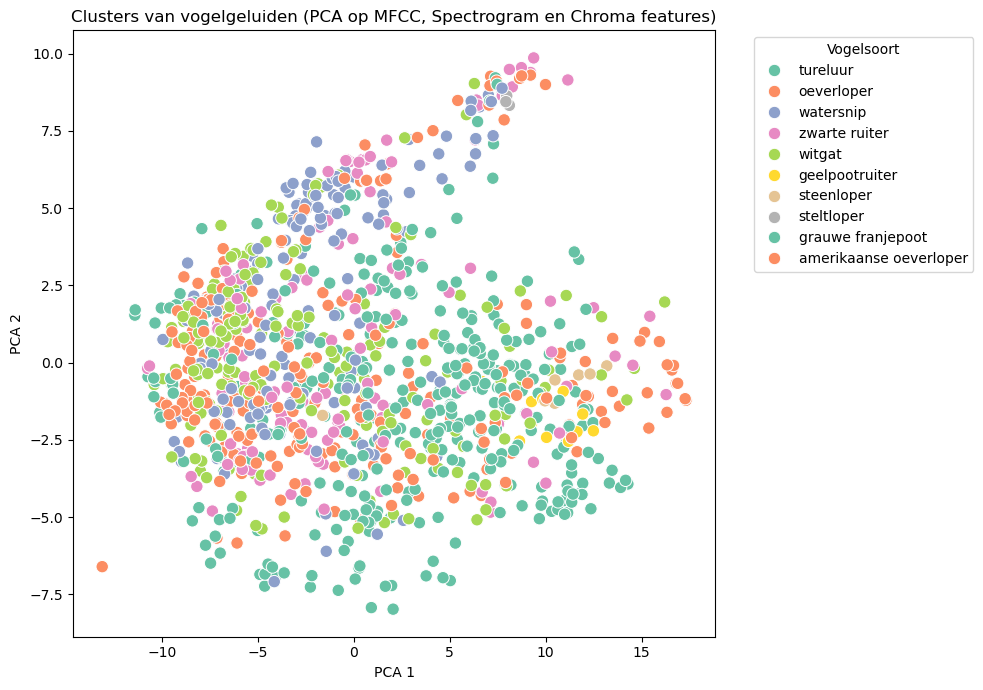

In [445]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_2)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=feature_df_2['label'], palette='Set2', s=80)
plt.title("Clusters van vogelgeluiden (PCA op MFCC, Spectrogram en Chroma features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()
plt.show()

##### Conclusie

Hieruit blijkt dat de agglomerative hierarchy clustering niet goed werkt voor onze casus, gezien de clusters niet goed genoeg gescheiden zijn van elkaar. Hier zijn een hele hoop feature-extractie methodes gebruikt, maar ook hier komen geen duidelijke resultaten uit.

## Evaluation

HDBSCAN werkt het beste op onze dataset .......

# Voorspellende Modellen

## Model: K-Nearest Neighbors (KNN)

In [449]:
from sklearn.neighbors import KNeighborsClassifier

In [450]:
# # Laad de fragmenten data
# fragmenten_df = pd.read_csv('Data/fragments_data.csv')
# train_data, test_data = train_test_split(fragmenten_df, test_size=0.3, random_state=42)
# test_data.head()

features_vm1 = []
for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    _, _, Zxx = stft(y, sr, nperseg=1024)
    stft_mean = np.mean(np.abs(Zxx))
    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))
    feature_vector = np.concatenate([mfcc_mean, [stft_mean], [stft_librosa_mean]])
    features_vm1.append(feature_vector)

features_vm1 = np.array(features_vm1)
scaler = StandardScaler()
features_vm1 = scaler.fit_transform(features_vm1)

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 1024 is greater than input length  = 369, using nperseg = 369
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 1024 is greater than input l

Accuracy: 0.6818181818181818
                        precision    recall  f1-score   support

amerikaanse oeverloper       0.00      0.00      0.00         1
        geelpootruiter       0.50      0.80      0.62         5
     grauwe franjepoot       0.40      0.67      0.50         3
            oeverloper       0.59      0.68      0.63        76
            steenloper       0.50      1.00      0.67         1
              tureluur       0.83      0.80      0.82       122
             watersnip       0.69      0.80      0.74        44
                witgat       0.53      0.53      0.53        53
         zwarte ruiter       0.74      0.43      0.54        47

              accuracy                           0.68       352
             macro avg       0.53      0.63      0.56       352
          weighted avg       0.69      0.68      0.68       352



c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


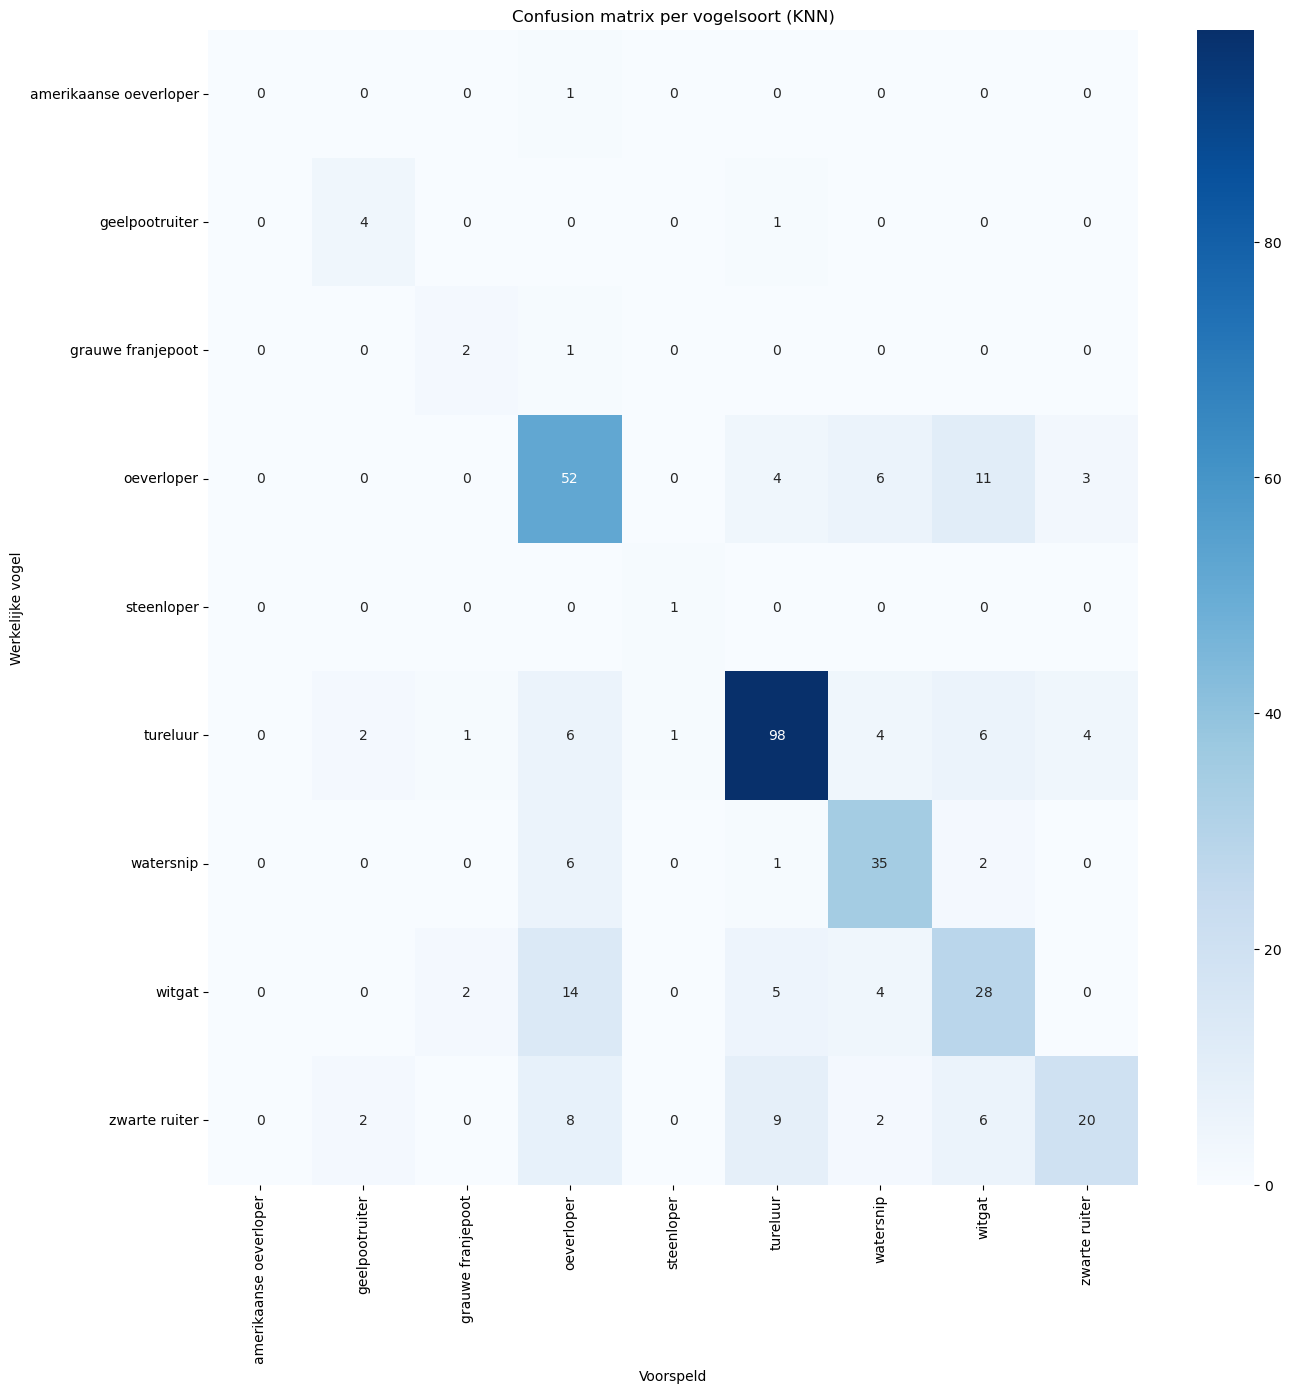

In [451]:
# Gebruik de vogelsoortnaam als label
X = features_vm1
y = test_data['labels']  # <-- gebruik de kolom met de soortnaam

# Train test split maken 70% test 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNeighborsClassifier trainen (bijvoorbeeld met k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Voorspellingen maken
y_pred = knn.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))

# Unieke vogelsoorten bepalen
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

print(classification_report(y_test, y_pred, labels=unique_labels, target_names=unique_labels))

# Confusion matrix tonen per vogelsoort
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Voorspeld')
plt.ylabel('Werkelijke vogel')
plt.title('Confusion matrix per vogelsoort (KNN)')
plt.show()

In [452]:
# Parameters
window_duration = 2  # seconden
hop_duration = 1   # overlap van 50%

# voorbeeld: audio_files\05190.100417.watersniproepEempolder.mp3
# Laad het fragment
nieuw_fragment = input("Geef het pad naar het nieuwe vogelgeluid (bijv. audio_files/test/XC809979 - European Nightjar - Caprimulgus europaeus.mp3): ")
if nieuw_fragment.strip() != "":
    y_new, sr_new = librosa.load(nieuw_fragment, sr=None)

    window_length = int(window_duration * sr_new)
    hop_length = int(hop_duration * sr_new)

    predictions = []

    for start in range(0, len(y_new) - window_length + 1, hop_length):
        y_window = y_new[start:start + window_length]
        mfcc = librosa.feature.mfcc(y=y_window, sr=sr_new, n_mfcc=13)
        mfcc_mean = np.mean(mfcc.T, axis=0)
        _, _, Zxx = stft(y_window, sr_new, nperseg=1024)
        stft_mean = np.mean(np.abs(Zxx))
        stft_librosa = librosa.stft(y_window, n_fft=1024, hop_length=512)
        stft_librosa_mean = np.mean(np.abs(stft_librosa))
        feature_vector = np.concatenate([mfcc_mean, [stft_mean], [stft_librosa_mean]])
        feature_vector_scaled = scaler.transform([feature_vector])
        voorspelde_vogel = knn.predict(feature_vector_scaled)[0]
        predictions.append(voorspelde_vogel)

    # Toon de voorspellingen per fragment
    print("Voorspellingen per venster:", predictions)

    # Meest voorkomende vogelsoort als eindresultaat
    meest_voorkomend = Counter(predictions).most_common(1)[0][0]
    print(f"Meest voorkomende voorspelde vogelsoort: {meest_voorkomend}")

## Model: SVR

SVR Mean Squared Error: 2.3252
SVR R^2 Score: 0.3565


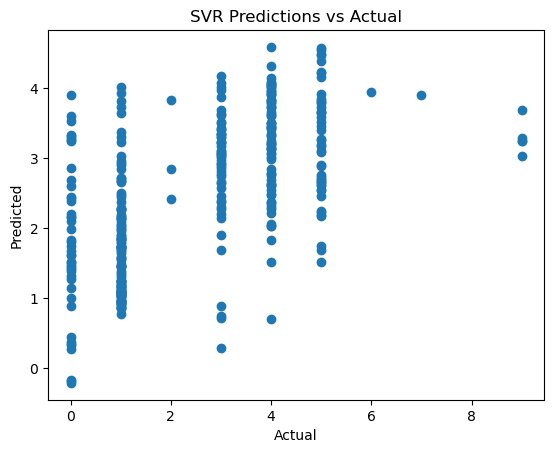

In [ ]:
# ...existing code...

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Example: Suppose you want to predict the 'target_column' in test_data
# Replace 'target_column' with the actual column name you want to predict
y = test_data['label_numeric'].values

# Split features and target into train/test sets (here, using all test_data for simplicity)
# In practice, use train_data for training and test_data for testing
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# Initialize and fit SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Mean Squared Error: {mse:.4f}")
print(f"SVR R^2 Score: {r2:.4f}")

# Optional: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR Predictions vs Actual")
plt.show()
# ...existing code...

## Model: Decision Tree

In [453]:
features_vm2 = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    # chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    # chroma_mean = np.mean(chroma.T, axis=0)

    # stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    # stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features_vm2.append(feature_vector)

features_vm2 = np.array(features_vm2)

scaler = StandardScaler()
features_vm2 = scaler.fit_transform(features_vm2)

distance_matrix = squareform(pdist(features_vm2, metric='euclidean'))

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=974
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1527
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=360
  warnings.warn(


Accuracy: 0.46875
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        44
           1       0.62      0.59      0.60       122
           2       0.00      0.00      0.00         3
           3       0.28      0.36      0.31        53
           4       0.49      0.54      0.52        76
           5       0.29      0.15      0.20        47
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5

    accuracy                           0.47       352
   macro avg       0.23      0.25      0.24       352
weighted avg       0.46      0.47      0.46       352



c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


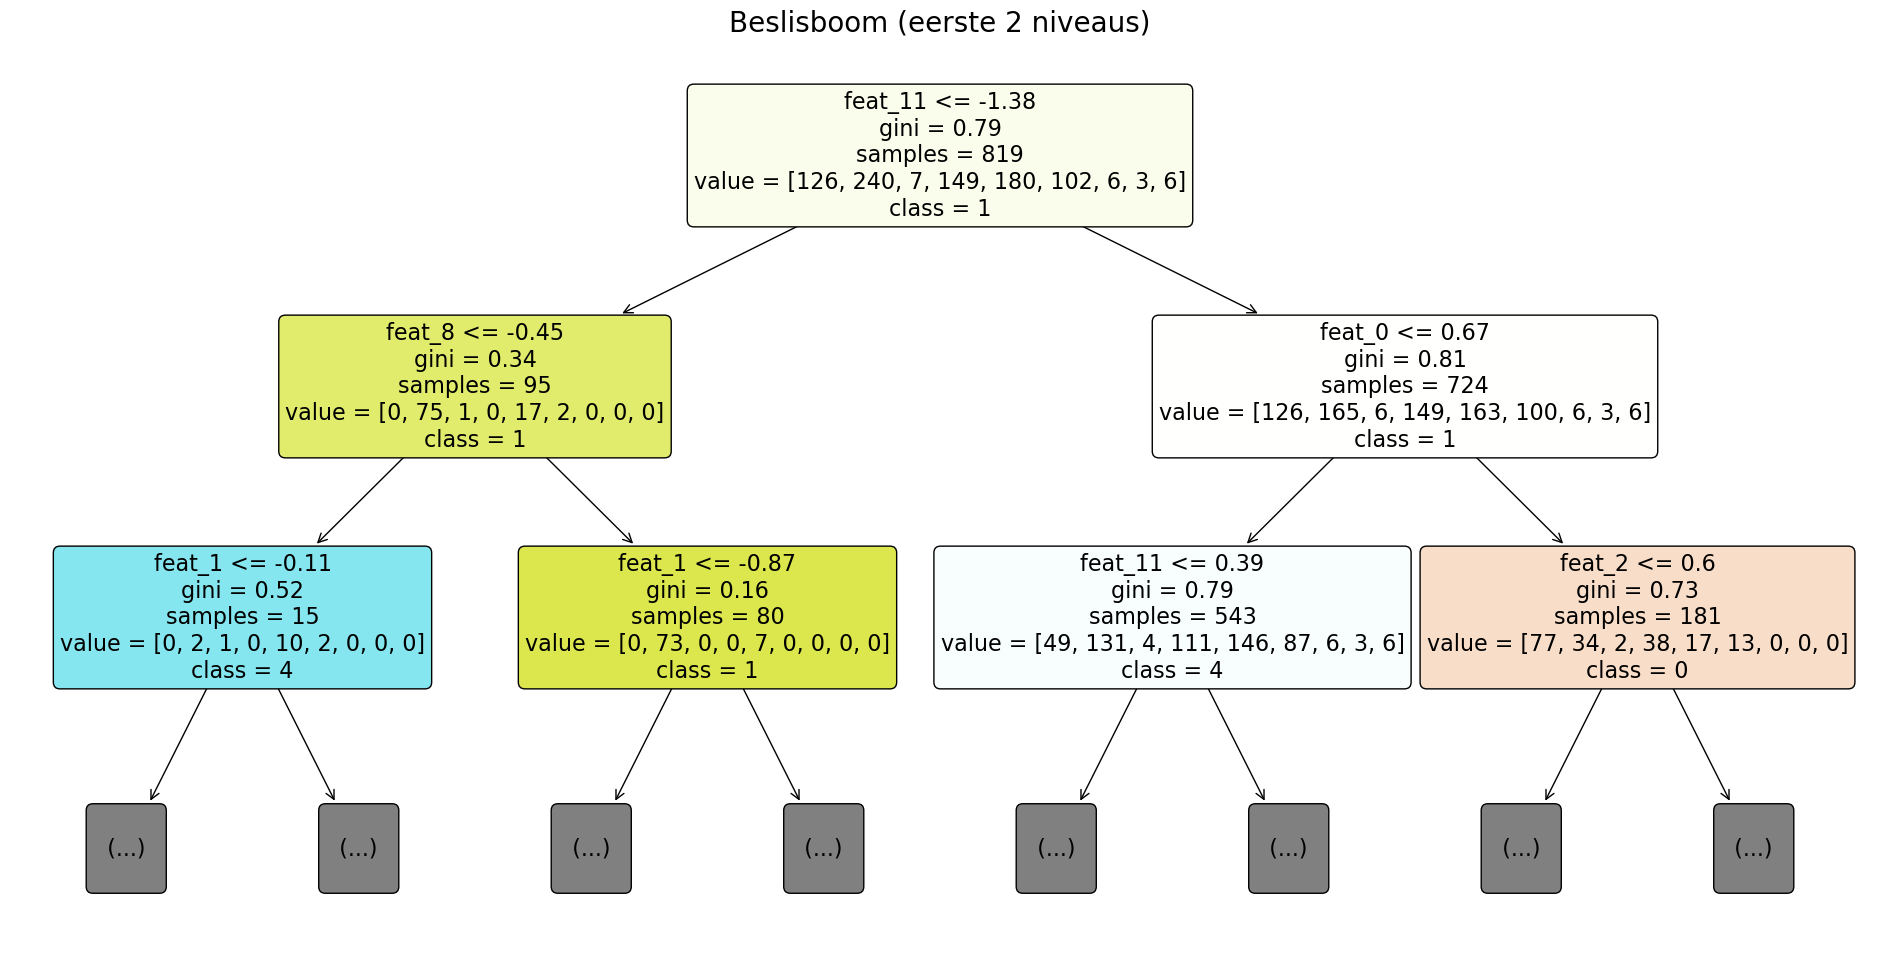

In [455]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Gebruik dezelfde features en labels
y = test_data['label_numeric'].values

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_vm2, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Voorspel
y_pred = tree.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot de boom (optioneel)
plt.figure(figsize=(24, 12))  # Vergroot het figuur
plot_tree(
    tree,
    feature_names=[f'feat_{i}' for i in range(features_vm2.shape[1])],
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    max_depth=2,
    fontsize=16,           # Grotere tekst in de boxen
    rounded=True,          # Mooier afgeronde boxen
    proportion=False,      # Boxen niet schalen op aantal samples
    precision=2            # Aantal decimalen in de boxen
)
plt.title("Beslisboom (eerste 2 niveaus)", fontsize=20)
plt.show()

## Model: Logistic Regression

In [457]:
import os
from sklearn.linear_model import LogisticRegression

# de fragmenten worden in dataframe gezet en in lijsten gezet
df = pd.read_csv('Data/fragments_data.csv')
audio_files = df['fragment'].tolist()
labels = df['labels'].tolist()


X = []
y = []

for file, label in zip(audio_files, labels):
    file_path = "audio_fragments/" + file
    if not os.path.exists(file_path):
        print(f"Bestand niet gevonden, overgeslagen: {file_path}")
        continue
    y_val, sr = librosa.load(file_path, sr=None)  # laad audio
    mfcc = librosa.feature.mfcc(y=y_val, sr=sr, n_mfcc=13)  
    mfcc_mean = np.mean(mfcc.T, axis=0)
    chroma = librosa.feature.chroma_stft(y=y_val, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)  
    features = np.concatenate([mfcc_mean, chroma_mean])
    X.append(features)  # combineer MFCCs en chroma
    y.append(label)

# x en y overzetten naar numpy arrays
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Voorspelling
y_pred = model.predict(X_test)
print("Nauwkeurigheid o.b.v. MFCC en Chromas:", accuracy_score(y_test, y_pred))

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1872
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=957
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=894
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1319
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=360
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa

Bestand niet gevonden, overgeslagen: audio_fragments/XC493556-190821TureluurVersterkt_fragment_2.wav


c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=213
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=542
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=827
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa

Nauwkeurigheid o.b.v. MFCC en Chromas: 0.5851472471190781


<Figure size 1500x1500 with 0 Axes>

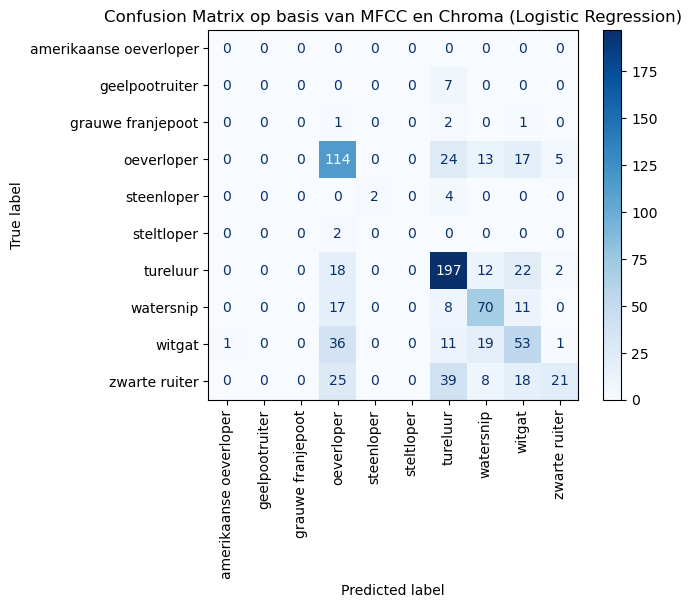

In [463]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

# Plot
plt.figure(figsize=(15, 15))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix op basis van MFCC en Chroma (Logistic Regression)')
plt.xticks(rotation=90)
plt.show()

c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


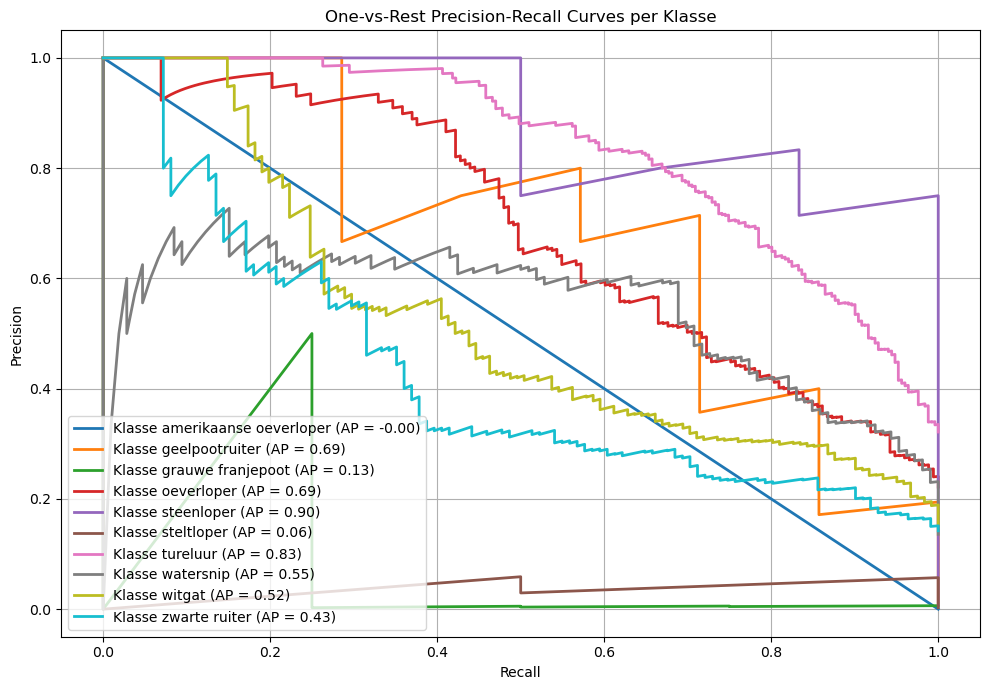

In [465]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Zet labels om naar binair formaat (One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

# Gemiddelde precision per klasse
plt.figure(figsize=(10, 7))

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Klasse {classes[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('One-vs-Rest Precision-Recall Curves per Klasse')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
plt.show()

## Model: Neural Networks

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1872
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=957
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=894
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1319
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=360
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa

Bestand niet gevonden, overgeslagen: audio_fragments/XC493556-190821TureluurVersterkt_fragment_2.wav


c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=213
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=542
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=827
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa

Epoch 1/30, Loss: 1.4674
Epoch 2/30, Loss: 1.1616
Epoch 3/30, Loss: 1.0522
Epoch 4/30, Loss: 0.9648
Epoch 5/30, Loss: 0.9110
Epoch 6/30, Loss: 0.8641
Epoch 7/30, Loss: 0.8283
Epoch 8/30, Loss: 0.7957
Epoch 9/30, Loss: 0.7670
Epoch 10/30, Loss: 0.7387
Epoch 11/30, Loss: 0.7079
Epoch 12/30, Loss: 0.7011
Epoch 13/30, Loss: 0.6650
Epoch 14/30, Loss: 0.6463
Epoch 15/30, Loss: 0.6272
Epoch 16/30, Loss: 0.6082
Epoch 17/30, Loss: 0.5927
Epoch 18/30, Loss: 0.5926
Epoch 19/30, Loss: 0.5648
Epoch 20/30, Loss: 0.5502
Epoch 21/30, Loss: 0.5207
Epoch 22/30, Loss: 0.5066
Epoch 23/30, Loss: 0.5043
Epoch 24/30, Loss: 0.5015
Epoch 25/30, Loss: 0.4856
Epoch 26/30, Loss: 0.4785
Epoch 27/30, Loss: 0.4760
Epoch 28/30, Loss: 0.4454
Epoch 29/30, Loss: 0.4427
Epoch 30/30, Loss: 0.4312

Test Accuracy: 0.8438


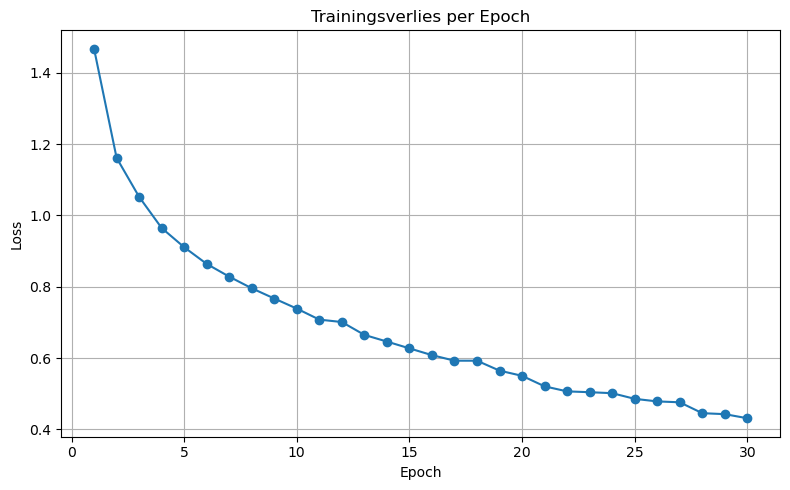

In [471]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ===== Data voorbereiden =====
df = pd.read_csv('Data/fragments_data.csv')
audio_files = df['fragment'].tolist()
labels = df['labels'].tolist()

X = []
y = []

for file, label in zip(audio_files, labels):
    if not os.path.exists("audio_fragments/" + file):
        print(f"Bestand niet gevonden, overgeslagen: {"audio_fragments/" + file}")
        continue
    y_val, sr = librosa.load("audio_fragments/" + file, sr=None)
    mfcc = librosa.feature.mfcc(y=y_val, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    chroma = librosa.feature.chroma_stft(y=y_val, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)
    features = np.concatenate([mfcc_mean, chroma_mean])
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Normaliseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Datasets
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# ===== Model bouwen =====
class StrongAudioNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = StrongAudioNet(input_dim=X.shape[1], num_classes=len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===== Trainen =====
losses = []
epochs = 30

for epoch in range(epochs):
    total_loss = 0
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# ===== Evalueren =====
model.eval()
with torch.no_grad():
    y_pred = torch.argmax(model(X_test), dim=1)
    accuracy = (y_pred == y_test).float().mean().item()
    print(f"\nTest Accuracy: {accuracy:.4f}")

# ===== Plot van de loss =====
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title('Trainingsverlies per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()
    

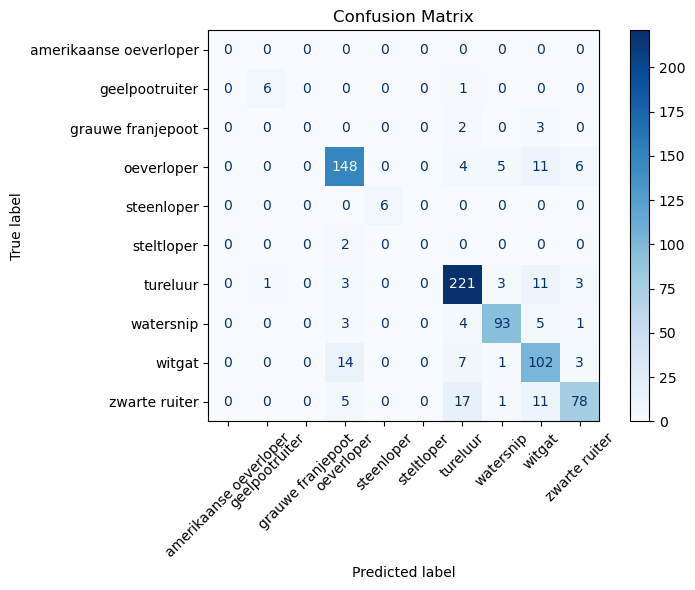

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Zorg dat alle klassen worden weergegeven, ook als ze niet in y_test zitten
all_labels = np.arange(len(le.classes_))
cm = confusion_matrix(y_test.numpy(), y_pred.numpy(), labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)  # kwartslag
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Model: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# features en labels maken
X = features
y = test_data['label_numeric']

# Train test maken
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random forest trainen met random state 42.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Voorspellingen maken
y_pred = rf.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))

# unieke labels tonen
unique_labels = np.unique(y_test)
target_names = [fragmenten_df[fragmenten_df['label_numeric'] == label]['labels'].iloc[0] for label in unique_labels]

print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))

Accuracy: 0.7727272727272727
                        precision    recall  f1-score   support

             watersnip       0.71      0.82      0.76        44
              tureluur       0.87      0.90      0.88       122
     grauwe franjepoot       1.00      0.33      0.50         3
                witgat       0.64      0.72      0.68        53
            oeverloper       0.71      0.82      0.76        76
         zwarte ruiter       0.91      0.45      0.60        47
amerikaanse oeverloper       0.00      0.00      0.00         1
            steenloper       1.00      1.00      1.00         1
        geelpootruiter       1.00      0.60      0.75         5

              accuracy                           0.77       352
             macro avg       0.76      0.63      0.66       352
          weighted avg       0.79      0.77      0.77       352



c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


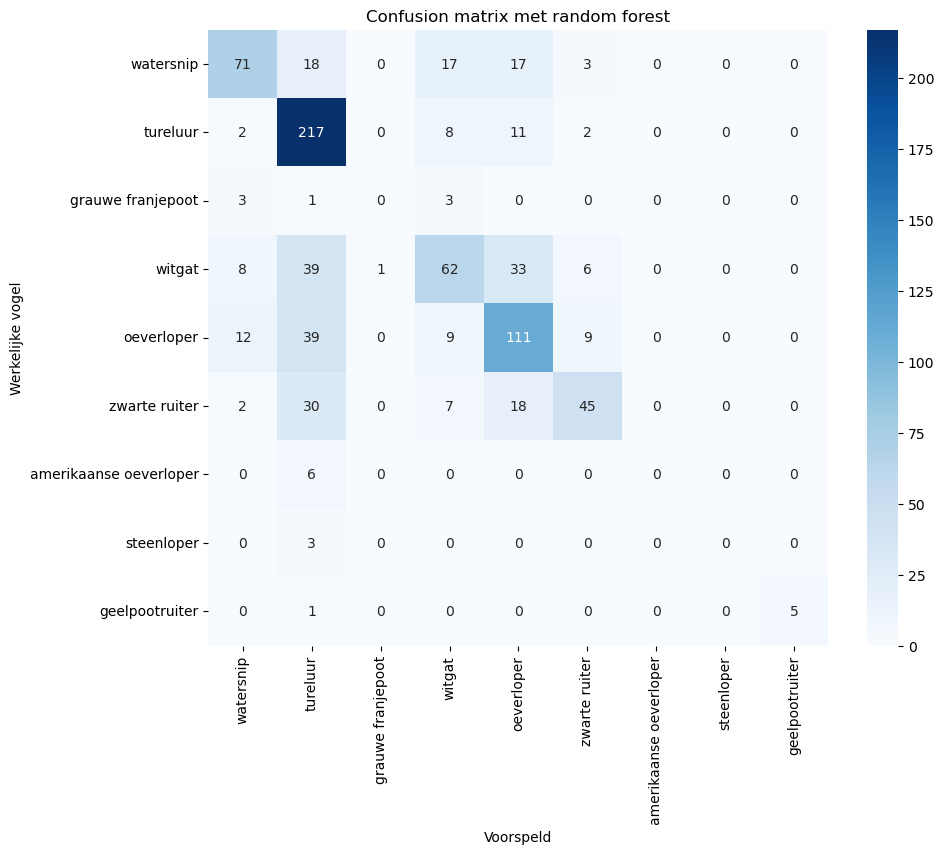

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Gebruik de features en labels van test_data
X = features
y = test_data['label_numeric']

# Train test split maken 70% test 30% train
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

# Random forest trainen met random state 42
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# voorspelling maken
y_pred = rf.predict(X_test)



# Tonenen heatmap confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Voorspeld')
plt.ylabel('Werkelijke vogel')
plt.title('Confusion matrix met random forest')
plt.show()



## Model: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Gebruik de features en labels van test_data
X = features
y = test_data['label_numeric']

# Train test split maken 70% test 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Classifier trainen
nb = GaussianNB()
nb.fit(X_train, y_train)

# Voorspellingen maken
y_pred = nb.predict(X_test)

# Evaluatie
print("Accuracy:", accuracy_score(y_test, y_pred))

# Labels tonen
unique_labels = np.unique(y_test)
target_names = [fragmenten_df[fragmenten_df['label_numeric'] == label]['labels'].iloc[0] for label in unique_labels]

print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))

Accuracy: 0.3835227272727273
                        precision    recall  f1-score   support

             watersnip       0.53      0.48      0.50        44
              tureluur       0.67      0.49      0.57       122
     grauwe franjepoot       0.07      0.67      0.13         3
                witgat       0.39      0.23      0.29        53
            oeverloper       0.58      0.24      0.34        76
         zwarte ruiter       0.13      0.36      0.20        47
amerikaanse oeverloper       0.00      0.00      0.00         1
            steenloper       1.00      1.00      1.00         1
        geelpootruiter       1.00      0.80      0.89         5

              accuracy                           0.38       352
             macro avg       0.48      0.47      0.43       352
          weighted avg       0.52      0.38      0.42       352



c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Remzi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


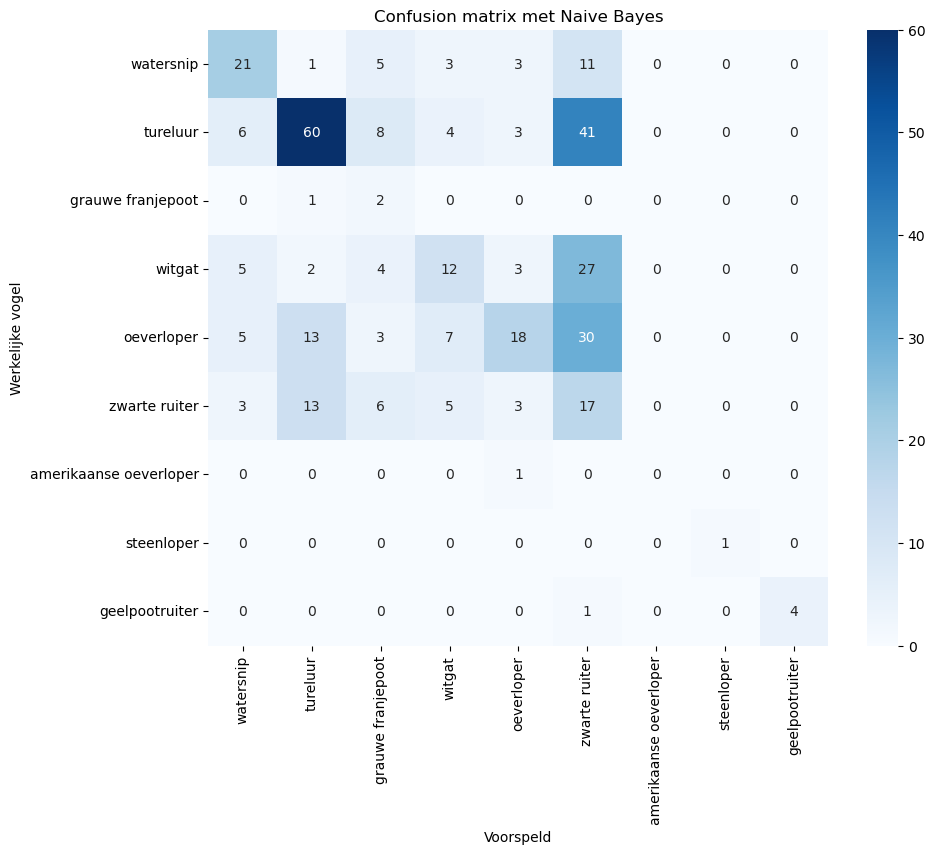

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# features gebruiken van hierboven
X = features
y = test_data['label_numeric']

# train test split maken 70% test 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Classifier trainen
nb = GaussianNB()
nb.fit(X_train, y_train)

# Voorspellen 
y_pred = nb.predict(X_test)

# Tonen heatmap confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Voorspeld')
plt.ylabel('Werkelijke vogel')
plt.title('Confusion matrix met Naive Bayes')
plt.show()

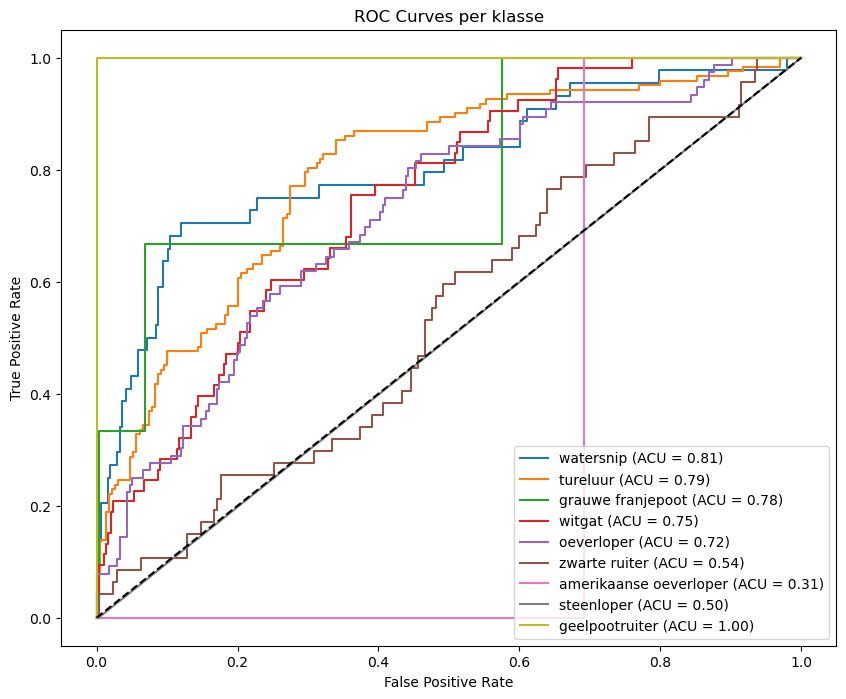

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# labels binarize voor ROC curve
y_test_bin = label_binarize(y_test, classes=unique_labels)
y_pred_prob = nb.predict_proba(X_test)

#tonen ROC curve
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (ACU = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves per klasse')
plt.legend()
plt.show()


# Evaluation

Gedurende het project zijn meerdere clustering- en classificatiemodellen onderzocht voor het automatisch herkennen en groeperen van vogelgeluiden.

## Feature Extractie

Wat betreft feature-extractie bleken **MFCC’s** het meest stabiel en effectief voor clustering. **Chroma features** toonden een duidelijke meerwaarde in de classificatie. **STFT** bleek slechts beperkt bij te dragen en wordt als optioneel beschouwd.

## Clustering

Van de vijf onderzochte clustermethoden (Birch, Affinity Propagation, DBSCAN, HDBSCAN en Agglomerative Hierarchical Clustering) bleken **DBSCAN en vooral HDBSCAN de beste resultaten** te leveren. De clusters waren visueel interpreteerbaar, logisch gegroepeerd en bevatten weinig tot geen outliers binnen de groepen. Daarentegen leverden methoden als **Affinity Propagation, BIRCH en Agglomerative Clustering inconsistente of slecht interpreteerbare resultaten** op. 

**HDBSCAN** kwam als beste methode naar voren, met name vanwege zijn vermogen om om te gaan met variabele dichtheden in grotere datasets.

## Voorspellende Modellen

Bij de classificatie van vogelgeluiden bleken Neural Networks en Random Forest Classifiers het meest accuraat, met respectievelijke accuraatheden van 84% en 77%. Deze modellen overtroffen eenvoudiger modellen zoals Logistic Regression (58%) en Naive Bayes (38%) ruimschoots. Neural Networks leverden bovendien minder spreiding in de voorspellingen, wat bijdraagt aan betrouwbaarheid.

## Conclusie

Het projectdoel – het aantonen dat clustering en **classificatie van vogelgeluiden technisch mogelijk** is – is succesvol behaald. De gekozen modellen leveren betrouwbare en reproduceerbare resultaten op.

# Deployment

De onderzoeksresultaten van het project kunnen op de volgende wijzen geïmplementeerd worden binnen een praktische toepassing:

## 1. Feature-extractie
De aanbevolen feature-extractie methodes zijn:

- MFCC's (Mel Frequency Cepstral Coefficients) voor timbre-informatie.
- Chroma features voor toonhoogte-informatie.

Deze features worden automatisch geëxtraheerd bij het uploaden van geluidsfragmenten en vormen de input voor zowel clustering als classificatie.

## 2. Clusteringsmethode

De clusteranalyse heeft aangetoond dat **HDBSCAN** de meest betrouwbare methode is voor het clusteren van vogelgeluiden, met name bij grotere datasets. Voor de implementatie van deze methode wordt geadviseerd:

- HDBSCAN te integreren.
- Inkomende geluidsfragmenten automatisch te analyseren en te groeperen in betekenisvolle clusters.
- Clusterinformatie visueel beschikbaar te maken in de gebruikersinterface.

## 3. Voorspellende modellen
Voor classificatie van vogelgeluiden wordt implementatie van de volgende modellen geadviseerd:

- Een **Neural Network**, als hoofdmodel voor het voorspellen van vogelsoorten op basis van geluidsdata.
- Een **Random Forest Classifier**

Beide modellen kunnen worden getraind op de bestaande dataset, en nieuwe geluidsopnames kunnen hiermee automatisch van een voorspelling worden voorzien.

## 4. Applicatie
Op basis van de succesvolle clustering- en classificatieresultaten wordt aanbevolen om te starten met de ontwikkeling van de mobiele applicatie. Deze app kan onder meer:

- Geluidsopnames van gebruikers verwerken.
- Automatisch geluidsfragmenten clusteren en voorspellen welke vogelsoort is gehoord. \
**En eventueel:** 
- Gebruikers feedback laten geven op de voorspellingen voor verdere verbetering van het model.

## 5. Documentatie en overdraagbaarheid
Om de overdracht naar toekomstige ontwikkelaars te faciliteren, wordt aanbevolen om:

- Een duidelijke installatiehandleiding op te stellen (inclusief gebruikte packages, versies en systeemvereisten).
- Een overzicht te maken van de gebruikte datasets en preprocessing-stappen